## Which is the greatest nation in tennis in the years 2019-2021
## Which are the top 5 players in the tennis ranking in the period 2019-2021

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import geopandas
plt.style.use('ggplot')

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

sns.set_theme(style="darkgrid")

pd.options.mode.chained_assignment = None  # default='warn'

## Load the data
The data is filtered in the period between 2019 to 2021

In [27]:
df_2019 = pd.read_csv("data/atp_matches_2019.csv")
df_2020 = pd.read_csv("data/atp_matches_2020.csv")
df_2021 = pd.read_csv("data/atp_matches_2021.csv")

seasons = [df_2019, df_2020, df_2021]
df_full = pd.concat(seasons)

# check whether we have same number of columns
# assert len(df_2019.columns) == len(df_full.columns)

df_full.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,c
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,NaN
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,NaN
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,NaN
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,NaN
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,NaN


Text(0.5, 1.0, 'Which tennis nation wins the most')

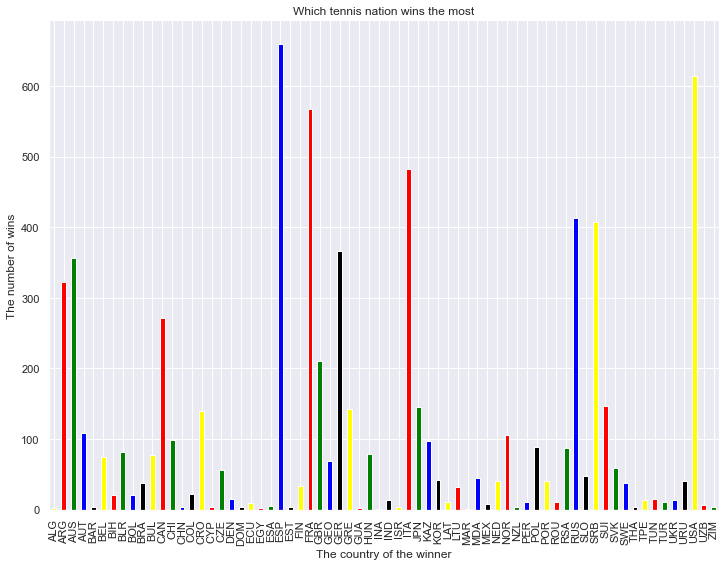

In [41]:
number_of_countries = df_full.groupby('winner_ioc')['winner_name'].count()
number_of_countries.plot(kind="bar", title="Which tennis nation wins the most", color=['yellow', 'red', 'green', 'blue', 'black'])
plt.xlabel('The country of the winner')
plt.ylabel("The number of wins")
plt.title('Which tennis nation wins the most')

## I inspect here that there are many countries in the bar plot and it is hard to visualize. 
## How this can be improved?


In [42]:
# here I present method for finding name and country and the respective country 
data_year = df_full.groupby(['winner_ioc','winner_name']).size()
data_year



winner_ioc  winner_name      
ALG         Lamine Ouahab          2
ARG         Diego Schwartzman    103
            Facundo Bagnis        14
            Federico Coria        22
            Federico Delbonis     47
                                ... 
USA         Zachary Svajda         1
UZB         Denis Istomin          4
            Jurabek Karimov        1
            Sanjar Fayziev         1
ZIM         Benjamin Lock          3
Length: 355, dtype: int64

## Removing NaN values

In [43]:
df_full.dropna(subset = ["winner_rank"], inplace=True)
df_full.dropna(subset = ["winner_id"], inplace=True)


In [44]:
#sorting the values vy winner rank
df_full.sort_values(['winner_rank'],ascending=True)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,c
693,2020-560,Us Open,Hard,128,G,20200831,100,104925,1.0,NaN,...,29.0,15.0,12.0,12.0,19.0,1.0,10860.0,109.0,524.0,33.278576
279,2020-580,Australian Open,Hard,128,G,20200120,212,104745,1.0,NaN,...,83.0,14.0,21.0,7.0,9.0,1.0,10235.0,26.0,1520.0,33.631759
152,2019-580,Australian Open,Hard,128,G,20190114,212,104925,1.0,NaN,...,65.0,17.0,19.0,11.0,18.0,1.0,9135.0,19.0,1865.0,NaN
1679,2021-560,Us Open,Hard,128,G,20210830,100,104925,1.0,NaN,...,30.0,22.0,17.0,6.0,14.0,1.0,11113.0,145.0,541.0,NaN
1678,2021-540,Wimbledon,Grass,128,G,20210628,226,104925,1.0,NaN,...,69.0,24.0,22.0,9.0,15.0,1.0,12113.0,9.0,4468.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2021-M-DC-2021-WG1-M-BEL-BOL-01,Davis Cup WG1 R1: BEL vs BOL,Clay,4,D,20210918,2,123961,NaN,NaN,...,39.0,18.0,14.0,8.0,12.0,1332.0,4.0,191.0,367.0,NaN
1413,2020-M-DC-2020-WG2-PO-INA-KEN-01,Davis Cup WG2 PO: INA vs KEN,Hard,4,D,20200306,2,105812,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1346.0,3.0,NaN,NaN,28.616016
1378,2020-M-DC-2020-WG1-PO-NOR-BAR-01,Davis Cup WG1 PO: NOR vs BAR,Hard,4,D,20200306,4,206716,NaN,NaN,...,9.0,9.0,7.0,2.0,8.0,1564.0,2.0,NaN,NaN,19.293634
1421,2020-M-DC-2020-WG2-PO-MAR-VIE-01,Davis Cup WG2 PO: MAR vs VIE,Clay,4,D,20200306,4,209119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1671.0,1.0,NaN,NaN,17.938398


In [45]:
df_filtered = df_full[['tourney_name','winner_name','winner_ioc','winner_id','winner_rank','winner_rank_points','winner_hand']]
df_filtered

,tourney_name,winner_name,winner_ioc,winner_id,winner_rank,winner_rank_points,winner_hand
0,Brisbane,Kei Nishikori,JPN,105453,9.0,3590.0,R
1,Brisbane,Daniil Medvedev,RUS,106421,16.0,1977.0,R
2,Brisbane,Kei Nishikori,JPN,105453,9.0,3590.0,R
3,Brisbane,Jo-Wilfried Tsonga,FRA,104542,239.0,200.0,R
4,Brisbane,Daniil Medvedev,RUS,106421,16.0,1977.0,R
...,...,...,...,...,...,...,...
2722,Davis Cup WG2 R1: THA vs DEN,August Holmgren,DEN,200416,905.0,16.0,R
2723,Davis Cup WG2 R1: THA vs DEN,Kasidit Samrej,THA,208937,1136.0,8.0,R
2724,Davis Cup WG2 R1: TUR vs LAT,Altug Celikbilek,TUR,123795,170.0,427.0,U
2725,Davis Cup WG2 R1: TUR vs LAT,Cem Ilkel,TUR,117356,176.0,408.0,R


## Filtering the data frame for players that have achieved more than 8000 rank points

In [46]:
filtered_rank_points_df = df_filtered[df_filtered['winner_rank_points']>8000]
filtered_rank_points_df



,tourney_name,winner_name,winner_ioc,winner_id,winner_rank,winner_rank_points,winner_hand
30,Doha,Novak Djokovic,SRB,104925,1.0,9045.0,R
34,Doha,Novak Djokovic,SRB,104925,1.0,9045.0,R
42,Doha,Novak Djokovic,SRB,104925,1.0,9045.0,R
139,Australian Open,Novak Djokovic,SRB,104925,1.0,9135.0,R
145,Australian Open,Novak Djokovic,SRB,104925,1.0,9135.0,R
...,...,...,...,...,...,...,...
2635,Davis Cup Finals SF: CRO vs SRB,Novak Djokovic,SRB,104925,1.0,11540.0,R
2641,Davis Cup Finals F: RTF vs CRO,Daniil Medvedev,RUS,106421,2.0,8640.0,R
2643,Davis Cup Finals SF: RTF vs GER,Daniil Medvedev,RUS,106421,2.0,8640.0,R
2645,Davis Cup Finals QF: RTF vs SWE,Daniil Medvedev,RUS,106421,2.0,8640.0,R


## My dataframe contains the number of wins by player from a specific country

([<matplotlib.axis.YTick at 0x1f4b0448ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

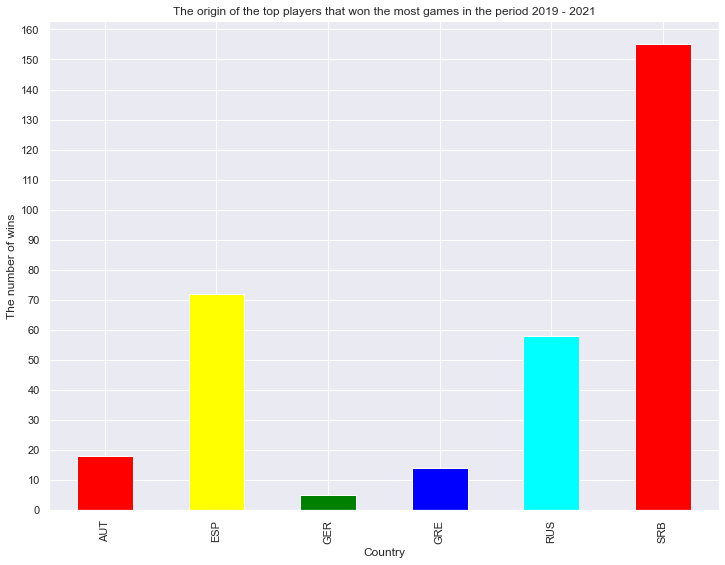

In [47]:
country_of_players_df = filtered_rank_points_df.groupby('winner_ioc')['winner_id'].size()
country_of_players_df
country_of_players_df.plot(kind="bar", title="The origin of the top players that won the most games in the period 2019 - 2021", color=['red', 'yellow', 'green', 'blue', 'cyan'])


plt.xlabel('Country')

plt.ylabel("The number of wins")
y = [0,160]
plt.yticks(np.arange(min(y), max(y)+1, 10))

In [48]:
country_of_players_df

winner_ioc
AUT     18
ESP     72
GER      5
GRE     14
RUS     58
SRB    155
Name: winner_id, dtype: int64

##  Serbia is the country that has won the most trophies in period 2019-2022 (Thank you Nole!)

## The most interesting question - Who are the tennis players ?

In [49]:
df_filtered.sort_values(['winner_rank'],ascending=True)
top_ten_players_df = df_filtered[(df_filtered['winner_rank']<10) &(df_filtered['winner_rank_points']>8000)] 
top_ten_players_df

,tourney_name,winner_name,winner_ioc,winner_id,winner_rank,winner_rank_points,winner_hand
30,Doha,Novak Djokovic,SRB,104925,1.0,9045.0,R
34,Doha,Novak Djokovic,SRB,104925,1.0,9045.0,R
42,Doha,Novak Djokovic,SRB,104925,1.0,9045.0,R
139,Australian Open,Novak Djokovic,SRB,104925,1.0,9135.0,R
145,Australian Open,Novak Djokovic,SRB,104925,1.0,9135.0,R
...,...,...,...,...,...,...,...
2635,Davis Cup Finals SF: CRO vs SRB,Novak Djokovic,SRB,104925,1.0,11540.0,R
2641,Davis Cup Finals F: RTF vs CRO,Daniil Medvedev,RUS,106421,2.0,8640.0,R
2643,Davis Cup Finals SF: RTF vs GER,Daniil Medvedev,RUS,106421,2.0,8640.0,R
2645,Davis Cup Finals QF: RTF vs SWE,Daniil Medvedev,RUS,106421,2.0,8640.0,R


## I am left with 332 competitions won by players who are with ranking < 10

winner_name
Alexander Zverev        5
Daniil Medvedev        58
Dominic Thiem          18
Novak Djokovic        155
Rafael Nadal           72
Stefanos Tsitsipas     14
Name: winner_id, dtype: int64

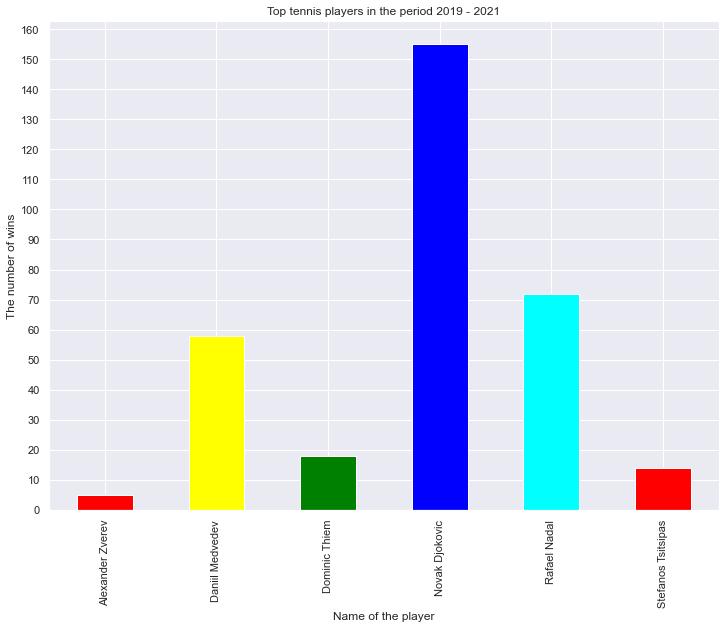

In [50]:
count_players_df = top_ten_players_df.groupby('winner_name')['winner_id'].size()

# count_players_df.plot.bar()
count_players_df.plot(kind="bar", title="Top 10 players", color=['red', 'yellow', 'green', 'blue', 'cyan'])

plt.xlabel('Name of the player')
plt.ylabel("The number of wins")
y = [0,160]
plt.yticks(np.arange(min(y), max(y)+1, 10))
plt.title('Top tennis players in the period 2019 - 2021')
count_players_df

##  This graph shoes us the current top 6 tennis player in the tennis ranklist
https://www.atptour.com/en/rankings/singles

 First place Noval Djokovic with 155 wins\
 Second place Rafael Nadal with 72 wins\
 Third place Daniil Medvedev with 58 wins